In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
housing_data = pd.read_csv('housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12193,-117.35,33.64,23.0,6859.0,1535.0,3405.0,1351.0,2.5395,109200.0,<1H OCEAN
6157,-117.96,34.08,39.0,1076.0,338.0,1242.0,332.0,2.2679,151800.0,<1H OCEAN
8037,-118.14,33.84,36.0,3002.0,484.0,1322.0,471.0,4.9330,228900.0,<1H OCEAN
605,-122.07,37.69,31.0,5914.0,1309.0,2999.0,1295.0,3.0964,190500.0,NEAR BAY
6866,-118.12,34.06,25.0,1137.0,293.0,800.0,281.0,2.4286,233300.0,<1H OCEAN


In [14]:
housing_data.shape

(20640, 10)

In [15]:
housing_data=housing_data.dropna()

In [16]:
housing_data.shape

(20433, 10)

In [18]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [20]:
housing_data =housing_data.drop(housing_data.loc[housing_data['median_house_value']== 500001].index)

In [21]:
housing_data.shape

(19475, 10)

In [22]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [33]:
housing_data.shape

(19475, 14)

In [34]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [31]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [36]:
x= housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

In [37]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [44]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [45]:
 y_train.shape, y_test.shape

((15580,), (3895,))

In [47]:
from sklearn.linear_model import LinearRegression

liner_model =LinearRegression(normalize=True).fit(x_train, y_train)

In [49]:
print("training Score:", liner_model.score(x_train, y_train))

training Score: 0.6144517228886925


In [52]:
predict = x_train.columns

predict

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [54]:
coef = pd.Series(liner_model.coef_, predict).sort_values()

coef

ocean_proximity_INLAND        -26159.748638
longitude                     -24128.122520
latitude                      -21929.945196
population                       -28.799551
total_rooms                       -7.602207
households                        44.501599
total_bedrooms                    89.479447
housing_median_age               869.588704
ocean_proximity_NEAR BAY        7044.601857
ocean_proximity_<1H OCEAN      13188.980312
ocean_proximity_NEAR OCEAN     16790.618180
median_income                  38485.507151
ocean_proximity_ISLAND        198064.380120
dtype: float64

In [55]:
y_pred = liner_model.predict(x_test)

In [56]:
def_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

def_pred_actual.head(10)

,predicted,actual
4001,352721.006983,367600.0
19684,86007.456229,61500.0
4022,225958.517416,213100.0
19461,251366.070778,199400.0
9034,103237.844050,106700.0
3002,117062.902396,70000.0
20285,233647.059482,185600.0
12729,196000.572385,144100.0
852,209094.101509,213200.0
9579,88997.002249,79700.0


In [57]:
from sklearn.metrics import r2_score

print("Testing_score:", r2_score(y_test, y_pred))

Testing_score: 0.6062973770407356


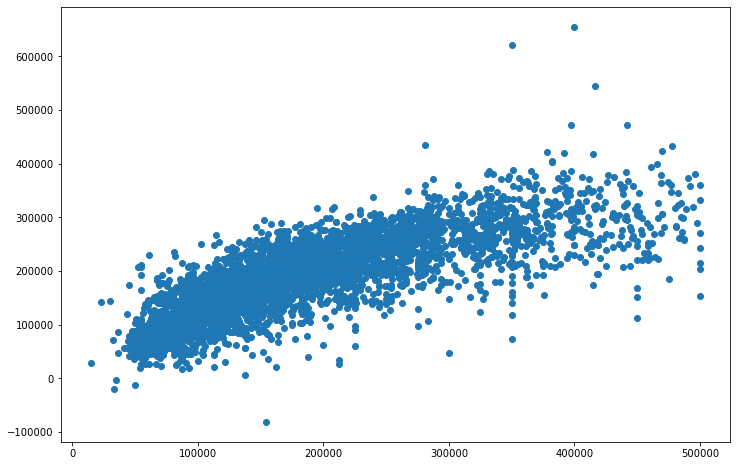

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [65]:
df_pres_sample = def_pred_actual.sample(100)
df_pres_sample = df_pres_sample.reset_index()

In [66]:
df_pres_sample.head()

,index,predicted,actual
0,20572,122159.546355,126700.0
1,16600,153069.282296,144900.0
2,9228,97625.287615,92200.0
3,6772,246701.775167,352800.0
4,20567,197287.472273,165000.0


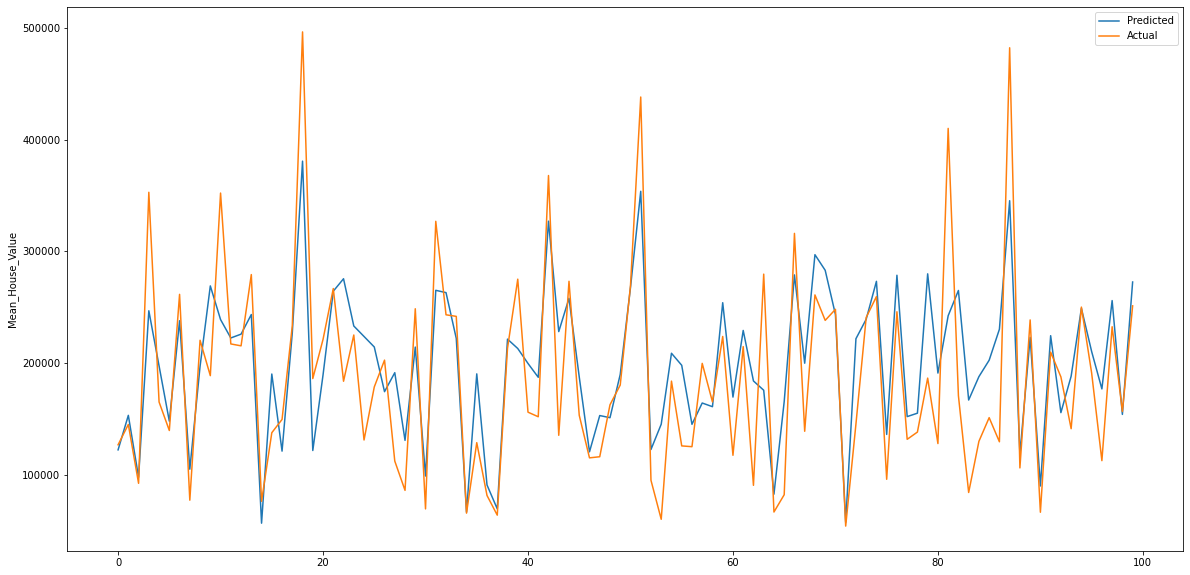

In [69]:
plt.figure(figsize = (20, 10))

plt.plot(df_pres_sample['predicted'], label='Predicted')
plt.plot(df_pres_sample['actual'], label='Actual')

plt.ylabel('Mean_House_Value')
plt.legend()
plt.show()